# Super_Market_Sales_Dataset

## Objective: To find behaviour of a product and store, which impacts the sales of a products.

In [1]:
#Importing Necessary Liabrary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing DataSet

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
#Combine test_data and train_data into one file

train_data['source']='train_data'
test_data['source']='test_data'
data = pd.concat([train_data, test_data],ignore_index=True,sort=False)
print(train_data.shape, test_data.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data


In [5]:
#Numerical data summary:

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Cleaning

In [6]:
#Check missing values:

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### Filling missing values

In [7]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train_data
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train_data
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train_data
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train_data
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train_data


In [8]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data


In [9]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [10]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [11]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            14204 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [13]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

# 1st uploas GIT

### Numerical and One-Hot Coding of Categorical variables

In [14]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [15]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [16]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train_data,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train_data,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train_data,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train_data,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train_data,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

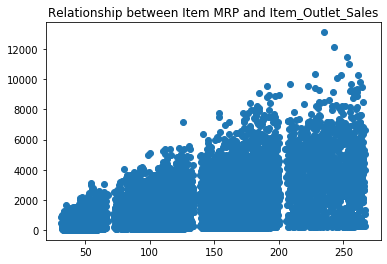

In [18]:
#Scatter plot(dot representation) to visualize the relationship between Item_MRP vs Target
plt.scatter(train_data.Item_MRP,train_data.Item_Outlet_Sales)
plt.title("Relationship between Item MRP and Item_Outlet_Sales")
plt.show()

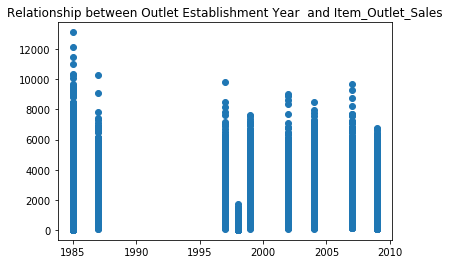

In [19]:
plt.scatter(train_data.Outlet_Establishment_Year ,train_data.Item_Outlet_Sales)
plt.title("Relationship between Outlet Establishment Year  and Item_Outlet_Sales")
plt.show()

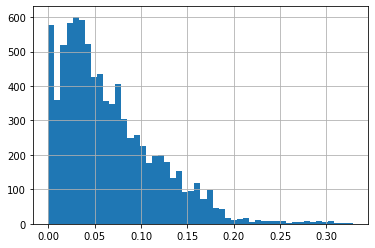

In [20]:
train_data['Item_Visibility'].hist(bins=50)

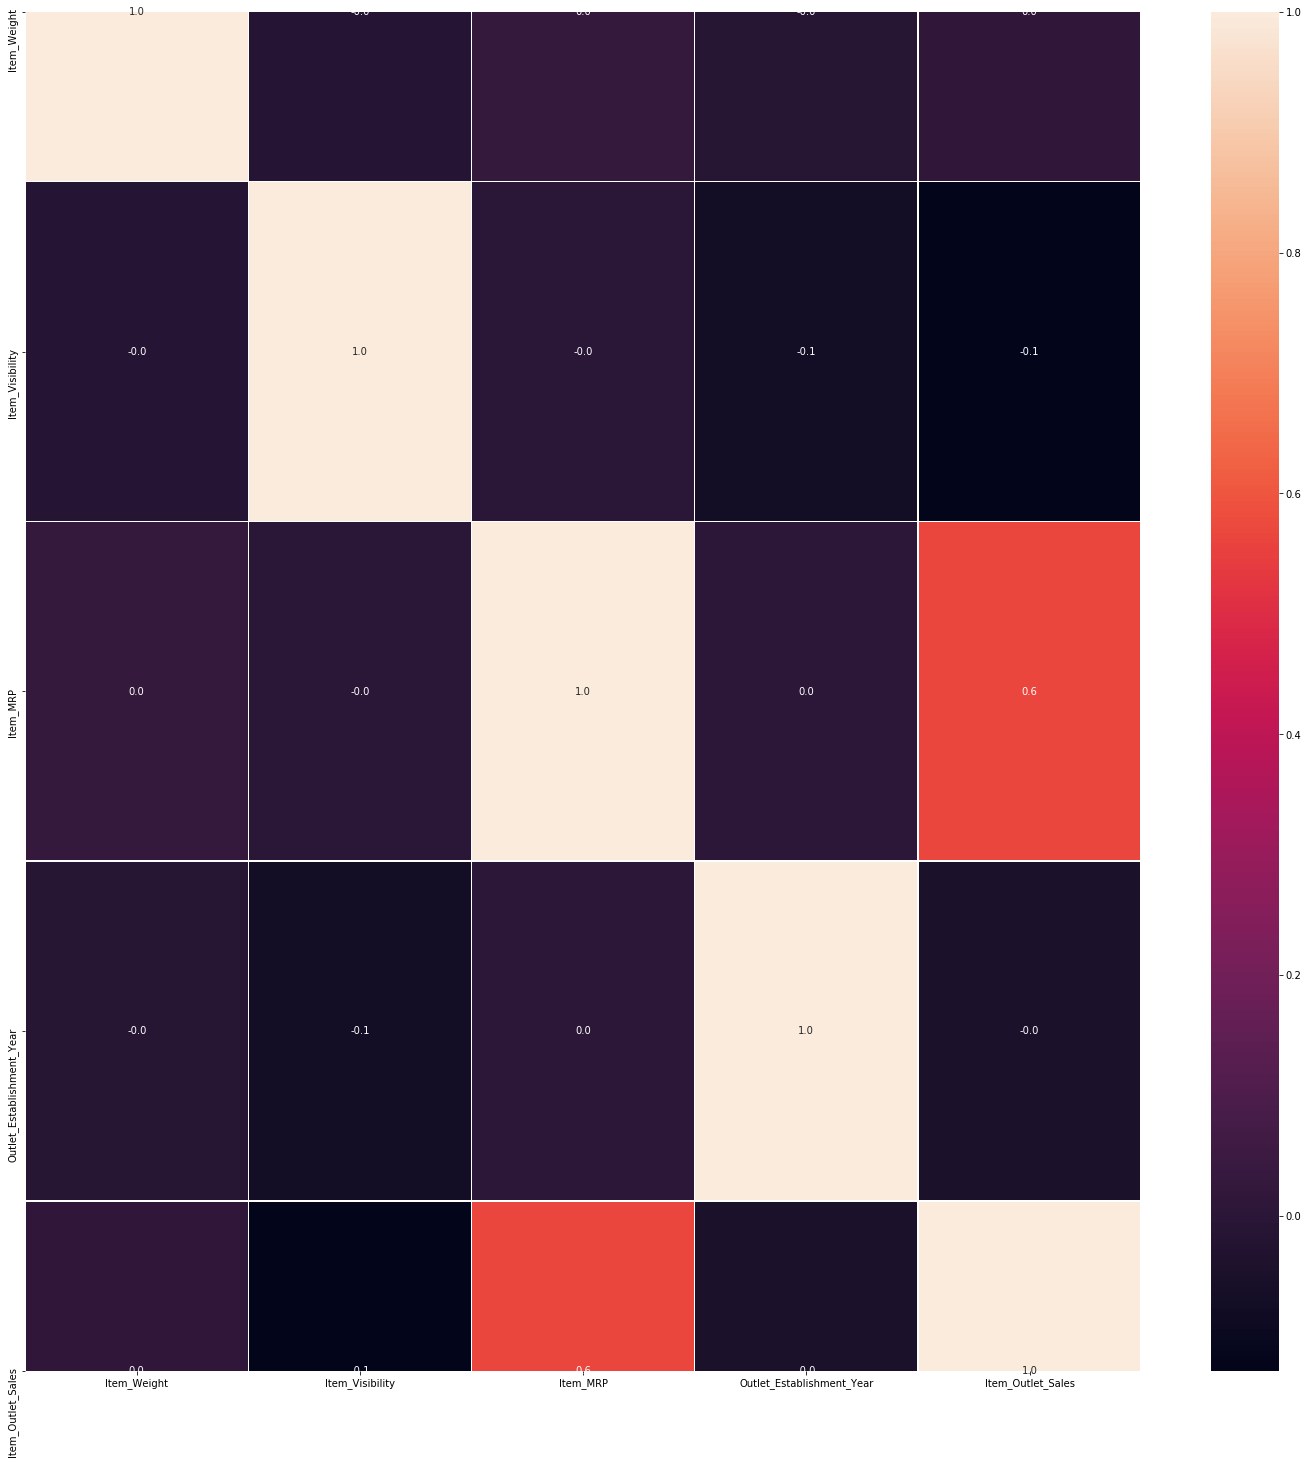

In [21]:
import seaborn as sns
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Exporting Data

In [22]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test_data and train_data:
train_data = data.loc[data['source']=="train_data"]
test_data = data.loc[data['source']=="test_data"]

#Drop unnecessary columns:
test_data.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train_data.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train_data.to_csv("train_data_modified.csv",index=False)
test_data.to_csv("test_data_modified.csv",index=False)

# Model Building

In [23]:
# Reading modified data
train_data2 = pd.read_csv("train_data_modified.csv")
test_data2 = pd.read_csv("test_data_modified.csv")

In [24]:
train_data2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
X_train_data = train_data2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train_data = train_data2.Item_Outlet_Sales

In [26]:
X_test_data = test_data2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [27]:
X_train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
y_train_data.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

## Linear Regression Model:

In [29]:
# Fitting Multiple Linear Regression to the train_dataing set

from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_data, y_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Predicting the test_data set results

y_pred = regressor.predict(X_test_data)

In [31]:
y_pred

array([1848.53604783, 1472.81670435, 1875.65285894, ..., 1809.18796433,
       3565.6645235 , 1267.46171871])

In [32]:
# Measuring Accuracy

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [33]:
lr_accuracy = round(regressor.score(X_train_data,y_train_data) * 100,2)
lr_accuracy

56.36

In [34]:
r2_score(y_train_data, regressor.predict(X_train_data))

0.563589277727048

In [35]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

#Perform cross-validation:

cv_score = cross_val_score(regressor, X_train_data, y_train_data, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.75571633 0.74509312 0.73995267 0.75255581 0.75171429]


In [36]:
import sklearn.metrics as metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train_data, regressor.predict(X_train_data))))

RMSE : 1127


In [37]:
submission = pd.DataFrame({
'Item_Identifier':test_data2['Item_Identifier'],
'Outlet_Identifier':test_data2['Outlet_Identifier'],
'Item_Outlet_Sales_LR': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales_LR'])

In [38]:
submission.to_csv('Result_1.csv',index=False)

## Decision Tree Model:

In [39]:
# Fitting Decision Tree Regression to the dataset

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train_data, y_train_data)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=300,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [40]:
# Predicting the test_data set results

y_pred = regressor.predict(X_test_data)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1892.06614452,
       3805.94860417, 1349.51290433])

In [41]:
tree_accuracy = round(regressor.score(X_train_data,y_train_data),2)
tree_accuracy

0.59

In [42]:
r2_score(y_train_data, regressor.predict(X_train_data))

0.5884050821570488

In [43]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train_data, y_train_data, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.76166126 0.74999795 0.72145219 0.75916104 0.75750393]


In [44]:
import sklearn.metrics as metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train_data, regressor.predict(X_train_data))))

RMSE : 1095


In [45]:
submission = pd.DataFrame({
'Item_Identifier':test_data2['Item_Identifier'],
'Outlet_Identifier':test_data2['Outlet_Identifier'],
'Item_Outlet_Sales_DT': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales_DT'])

In [46]:
submission.to_csv('Result_2.csv',index=False)

## Random Forest Model:

In [47]:
# Fitting Random Forest Regression to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train_data, y_train_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [48]:
# Predicting the test_data set results

y_pred = regressor.predict(X_test_data)
y_pred

array([1629.02201921, 1354.63136804,  589.63213862, ..., 1970.58779633,
       3738.64051048, 1305.16014468])

In [49]:
rf_accuracy = round(regressor.score(X_train_data,y_train_data),2)
rf_accuracy

0.61

In [50]:
r2_score(y_train_data, regressor.predict(X_train_data))

0.6125485585962837

In [51]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train_data, y_train_data, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.77946073 0.76589363 0.75896262 0.78046549 0.77939309]


In [52]:
import sklearn.metrics as metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train_data, regressor.predict(X_train_data))))

RMSE : 1062


In [53]:
submission = pd.DataFrame({
'Item_Identifier':test_data2['Item_Identifier'],
'Outlet_Identifier':test_data2['Outlet_Identifier'],
'Item_Outlet_Sales_RF': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales_RF'])

In [54]:
submission.to_csv('Result_3.csv',index=False)

## K Nearest Neighbour Model:

In [55]:
# Fitting K Nearest Neighbour to the dataset

from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=100)
regressor.fit(X_train_data, y_train_data)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                    weights='uniform')

In [56]:
# Predicting the test_data set results

y_pred = regressor.predict(X_test_data)
y_pred

array([1438.474216, 1347.9121  , 3658.278048, ..., 1806.04908 ,
       3185.666576, 1350.34227 ])

In [57]:
Knn_accuracy = round(regressor.score(X_train_data,y_train_data),2)
Knn_accuracy

0.36

In [58]:
r2_score(y_train_data, regressor.predict(X_train_data))

0.3604396873710306

In [59]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train_data, y_train_data, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.59446803 0.58012633 0.57452266 0.57650795 0.56868675]


In [60]:
import sklearn.metrics as metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train_data, regressor.predict(X_train_data))))

RMSE : 1365


In [61]:
submission = pd.DataFrame({
'Item_Identifier':test_data2['Item_Identifier'],
'Outlet_Identifier':test_data2['Outlet_Identifier'],
'Item_Outlet_Sales_KNN': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales_KNN'])

In [62]:
submission.to_csv('Result_4.csv',index=False)

## Support Vector Model:

In [63]:
# Fitting Support Vector Model for the dataset

from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_data, y_train_data)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
# Predicting the test_data set results

y_pred = regressor.predict(X_test_data)
y_pred

array([1758.23130656, 1707.66426682, 1849.28680137, ..., 1786.79385112,
       1834.71559161, 1712.13138614])

In [65]:
svm_accuracy = round(regressor.score(X_train_data,y_train_data),2)
svm_accuracy

-0.01

In [66]:
r2_score(y_train_data, regressor.predict(X_train_data))

-0.0062574793309828625

In [67]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train_data, y_train_data, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.15293289 0.06663731 0.16611761 0.1180308  0.10246336]


In [68]:
import sklearn.metrics as metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train_data, regressor.predict(X_train_data))))

RMSE : 1712


In [69]:
submission = pd.DataFrame({
'Item_Identifier':test_data2['Item_Identifier'],
'Outlet_Identifier':test_data2['Outlet_Identifier'],
'Item_Outlet_Sales_SVM': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales_SVM'])

submission.to_csv('Result_5.csv',index=False)

## Gradient Boosting Model:

In [70]:
# Fitting Gradient Boosting Model for the dataset

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
regressor = HistGradientBoostingRegressor()
regressor.fit(X_train_data, y_train_data)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=256,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0)

In [71]:
# Predicting the test_data set results

y_pred = regressor.predict(X_test_data)
y_pred

array([1797.36951795, 1373.88432764,  673.43360198, ..., 1781.03166294,
       4734.64723756, 1320.92301029])

In [72]:
GBM_accuracy = round(regressor.score(X_train_data,y_train_data),2)
GBM_accuracy

0.71

In [73]:
r2_score(y_train_data, regressor.predict(X_train_data))

0.7052393633974738

In [74]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train_data, y_train_data, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.76727674 0.74578284 0.73955334 0.76995607 0.76386351]


In [75]:
import sklearn.metrics as metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train_data, regressor.predict(X_train_data))))

RMSE : 926.4


In [76]:
submission = pd.DataFrame({
'Item_Identifier':test_data2['Item_Identifier'],
'Outlet_Identifier':test_data2['Outlet_Identifier'],
'Item_Outlet_Sales_GBM': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales_GBM'])

submission.to_csv('Result_6.csv',index=False)

## XG-BOOST Model:

In [77]:
#!pip install xgboost

In [78]:
# Fitting XG Boost Model for the dataset

from xgboost.sklearn import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train_data, y_train_data)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [79]:
# Predicting the test_data set results

y_pred = regressor.predict(X_test_data)
y_pred

array([1485.736 , 1362.3511,  691.9817, ..., 1667.3201, 4665.3755,
       1560.9052], dtype=float32)

In [80]:
xgb_accuracy = round(regressor.score(X_train_data,y_train_data),2)
xgb_accuracy

0.83

In [81]:
r2_score(y_train_data, regressor.predict(X_train_data))

0.8279267956346142

In [82]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train_data, y_train_data, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.74018761 0.71137745 0.70741326 0.7276448  0.73069441]


In [83]:
import sklearn.metrics as metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train_data, regressor.predict(X_train_data))))

RMSE : 707.8


In [84]:
submission = pd.DataFrame({
'Item_Identifier':test_data2['Item_Identifier'],
'Outlet_Identifier':test_data2['Outlet_Identifier'],
'Item_Outlet_Sales_XGB': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales_XGB'])

submission.to_csv('Result_7.csv',index=False)

# Data Orientation

In [85]:
import pandas as pd
LR= pd.read_csv('Result_1.csv')
DT= pd.read_csv('Result_2.csv')
RF= pd.read_csv('Result_3.csv')
KNN= pd.read_csv('Result_4.csv')
SVM= pd.read_csv('Result_5.csv')
GBM= pd.read_csv('Result_6.csv')
XGB= pd.read_csv('Result_7.csv')

In [89]:
import pandas as pd
# using .merge() function
re = pd.merge(df, df1, on=['Item_Identifier','Outlet_Identifier'])

re.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales_LR,Item_Outlet_Sales_DT
0,FDW58,OUT049,1848.536048,1673.983987
1,FDW14,OUT017,1472.816704,1349.512904
2,NCN55,OUT010,1875.652859,471.306847
3,FDQ58,OUT017,2593.644690,2432.662581
4,FDY38,OUT027,5181.558341,5041.821497


In [90]:
# using .merge() function
res = pd.merge(re, df2, on=['Item_Identifier','Outlet_Identifier'])

res.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales_LR,Item_Outlet_Sales_DT,Item_Outlet_Sales_RF
0,FDW58,OUT049,1848.536048,1673.983987,1629.022019
1,FDW14,OUT017,1472.816704,1349.512904,1354.631368
2,NCN55,OUT010,1875.652859,471.306847,589.632139
3,FDQ58,OUT017,2593.644690,2432.662581,2498.967138
4,FDY38,OUT027,5181.558341,5041.821497,6262.896666


In [91]:
# using .merge() function
resu = pd.merge(res, df3, on=['Item_Identifier','Outlet_Identifier'])
resu.head()


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales_LR,Item_Outlet_Sales_DT,Item_Outlet_Sales_RF,Item_Outlet_Sales_KNN
0,FDW58,OUT049,1848.536048,1673.983987,1629.022019,1438.474216
1,FDW14,OUT017,1472.816704,1349.512904,1354.631368,1347.912100
2,NCN55,OUT010,1875.652859,471.306847,589.632139,3658.278048
3,FDQ58,OUT017,2593.644690,2432.662581,2498.967138,2181.500358
4,FDY38,OUT027,5181.558341,5041.821497,6262.896666,3905.955648


In [92]:
# using .merge() function
resul = pd.merge(resu, df4, on=['Item_Identifier','Outlet_Identifier'])
resul.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales_LR,Item_Outlet_Sales_DT,Item_Outlet_Sales_RF,Item_Outlet_Sales_KNN,Item_Outlet_Sales_SVM
0,FDW58,OUT049,1848.536048,1673.983987,1629.022019,1438.474216,1758.231307
1,FDW14,OUT017,1472.816704,1349.512904,1354.631368,1347.912100,1707.664267
2,NCN55,OUT010,1875.652859,471.306847,589.632139,3658.278048,1849.286801
3,FDQ58,OUT017,2593.644690,2432.662581,2498.967138,2181.500358,1825.940482
4,FDY38,OUT027,5181.558341,5041.821497,6262.896666,3905.955648,1859.554095


In [93]:
# using .merge() function
result = pd.merge(resul, df5, on=['Item_Identifier','Outlet_Identifier'])
result.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales_LR,Item_Outlet_Sales_DT,Item_Outlet_Sales_RF,Item_Outlet_Sales_KNN,Item_Outlet_Sales_SVM,Item_Outlet_Sales_GBM
0,FDW58,OUT049,1848.536048,1673.983987,1629.022019,1438.474216,1758.231307,1797.369518
1,FDW14,OUT017,1472.816704,1349.512904,1354.631368,1347.912100,1707.664267,1373.884328
2,NCN55,OUT010,1875.652859,471.306847,589.632139,3658.278048,1849.286801,673.433602
3,FDQ58,OUT017,2593.644690,2432.662581,2498.967138,2181.500358,1825.940482,2246.662042
4,FDY38,OUT027,5181.558341,5041.821497,6262.896666,3905.955648,1859.554095,6459.021862


In [94]:
# using .merge() function
result_new = pd.merge(result, df6, on=['Item_Identifier','Outlet_Identifier'])
result_new.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales_LR,Item_Outlet_Sales_DT,Item_Outlet_Sales_RF,Item_Outlet_Sales_KNN,Item_Outlet_Sales_SVM,Item_Outlet_Sales_GBM,Item_Outlet_Sales_XGB
0,FDW58,OUT049,1848.536048,1673.983987,1629.022019,1438.474216,1758.231307,1797.369518,1485.7360
1,FDW14,OUT017,1472.816704,1349.512904,1354.631368,1347.912100,1707.664267,1373.884328,1362.3511
2,NCN55,OUT010,1875.652859,471.306847,589.632139,3658.278048,1849.286801,673.433602,691.9817
3,FDQ58,OUT017,2593.644690,2432.662581,2498.967138,2181.500358,1825.940482,2246.662042,2776.6663
4,FDY38,OUT027,5181.558341,5041.821497,6262.896666,3905.955648,1859.554095,6459.021862,5843.4336


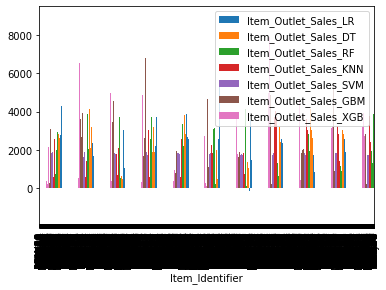

In [97]:
import matplotlib.pyplot as pls
gcf=result_new.plot(x="Item_Identifier", y=["Item_Outlet_Sales_LR", "Item_Outlet_Sales_DT", "Item_Outlet_Sales_RF","Item_Outlet_Sales_KNN",
                "Item_Outlet_Sales_SVM","Item_Outlet_Sales_GBM","Item_Outlet_Sales_XGB"], kind="bar")

In [98]:
plt.show()

In [99]:
#plt.savefig('Predict_Comparision.png')

In [100]:
import matplotlib.pyplot as plt
# plot whatever you need...
# now, before saving to file:
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("myplot.png", dpi = 100)

<Figure size 576x432 with 0 Axes>

In [101]:
plt.show()

## Algorithm Comparision:

In [102]:
# prepare models

models = []
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('KNNR', KNeighborsRegressor()))
models.append(('SVMR', SVR()))
models.append(('GBMR', HistGradientBoostingRegressor()))
models.append(('XGBR', XGBRegressor()))

In [103]:
# evaluate each model in turn

from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_data, y_train_data, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.560331 (0.021235)
DTR: 0.189035 (0.077585)
RFR: 0.516826 (0.041184)
KNNR: 0.438555 (0.063267)
SVMR: -0.011705 (0.011617)
GBMR: 0.573821 (0.036751)
XGBR: 0.534028 (0.033199)


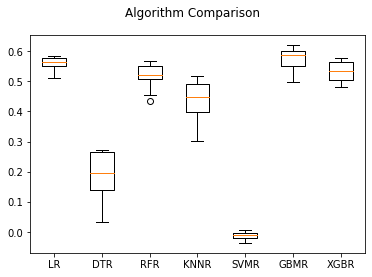

In [104]:
# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [105]:
#!pip install xgboost
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network

import xgboost as xgb
from xgboost.sklearn import XGBRegressor
MLA = [
    #Ensemble Methods
    linear_model.LinearRegression(),
    tree.DecisionTreeRegressor(),
    ensemble.RandomForestRegressor(),
    neighbors.KNeighborsRegressor(),
    svm.SVR(),
    ensemble.HistGradientBoostingRegressor(),
    xgb.XGBRegressor(),
    ]

In [106]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train_data, y_train_data).predict(X_test_data)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train_data, y_train_data), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test_data,y_pred), 4)
    MLA_compare.loc[row_index, 'MLA Accuracy'] = round(alg.score(X_train_data,y_train_data),4)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare


,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Accuracy
6,XGBRegressor,0.8279,1.0000,0.8279
5,HistGradientBoostingRegressor,0.7052,0.9374,0.7052
2,RandomForestRegressor,0.9208,0.8698,0.9208
0,LinearRegression,0.5636,0.8444,0.5636
3,KNeighborsRegressor,0.6384,0.7404,0.6384
1,DecisionTreeRegressor,1.0000,0.3760,1.0000
4,SVR,-0.0063,-0.0133,-0.0063


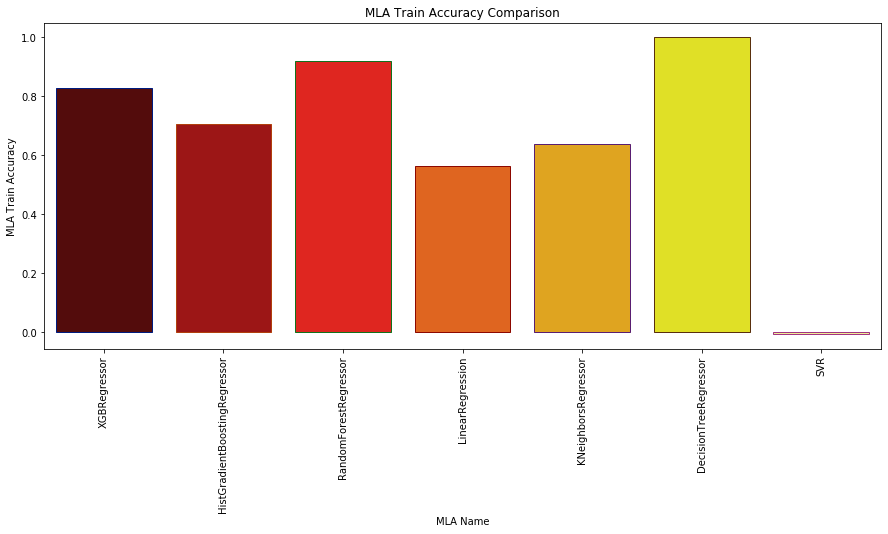

In [107]:
import seaborn as sns

plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

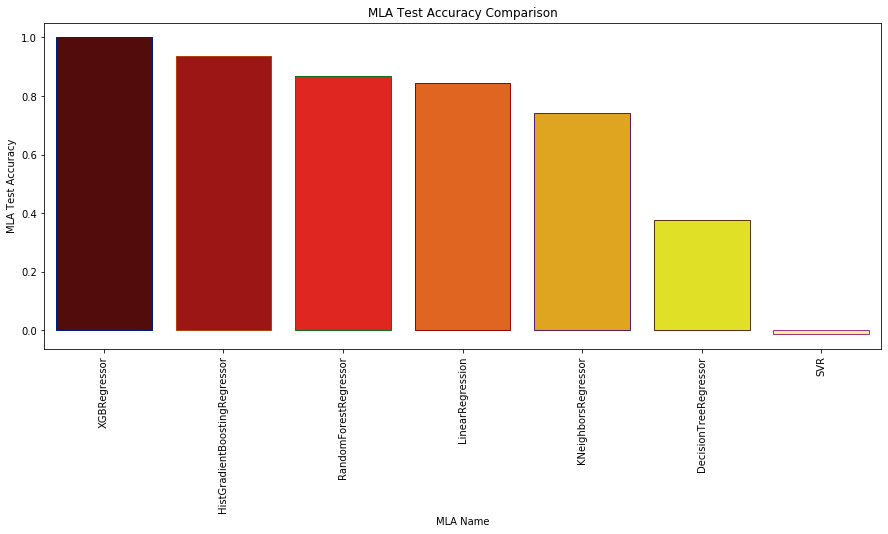

In [108]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

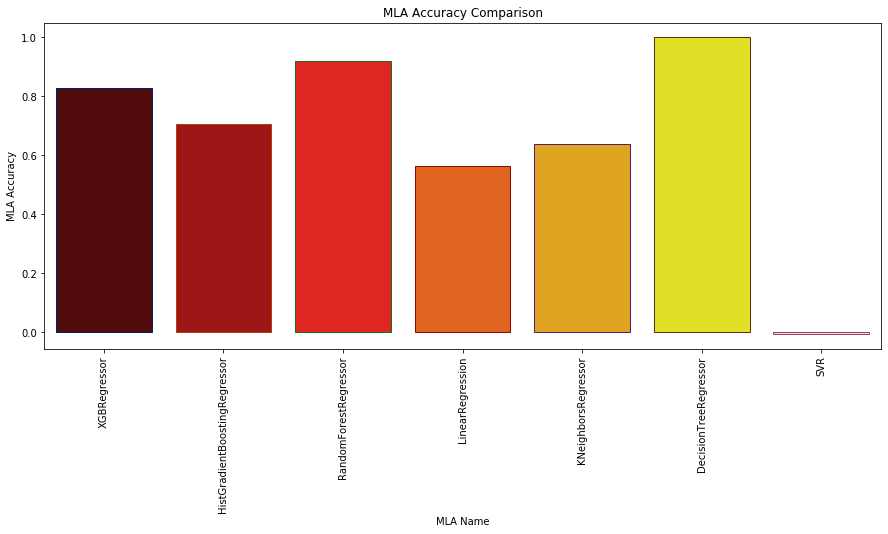

In [109]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.show()